In [1]:
%load_ext autotime

time: 630 µs (started: 2021-07-23 19:07:46 -03:00)


In [2]:
import sys
sys.path.append("..")

time: 473 µs (started: 2021-07-23 19:07:46 -03:00)


In [3]:
import pandas as pd
from scipy.optimize import curve_fit

time: 541 ms (started: 2021-07-23 19:07:46 -03:00)


In [4]:

features = {'Dist km': 'distance',
            'Elv m': 'uphill'}

target = {'Moving Time': 'duration'}

df = (pd.read_csv('../data/activities.csv')
        .rename(columns={**features, **target})
        .assign(duration=lambda df: df.duration / (60 * 60))
        .assign(distance=lambda df: df.distance / 1000)
        .assign(group_size=lambda df: df['Group Size'])
        .query('distance > 50 & uphill > 900 & distance < 350 & group_size < 2')
     )

X = df.loc[:, features.values()]
y = df.loc[:, target.values()]


FileNotFoundError: [Errno 2] No such file or directory: '../data/activities.csv'

time: 92.3 ms (started: 2021-07-23 19:07:46 -03:00)


In [5]:
def f(x, a, v):
    # T = D * (a * u) / v
    return (x.distance + x.uphill / a) / v



time: 527 µs (started: 2021-07-23 19:07:49 -03:00)


In [6]:
curve_fit(f, 
          X, 
          y.duration,
          p0=[60, 25])

NameError: name 'X' is not defined

time: 11.9 ms (started: 2021-07-23 19:07:50 -03:00)


In [7]:
430 / 14

30.714285714285715

time: 14.1 ms (started: 2021-07-23 19:07:51 -03:00)


In [8]:
from dataclasses import dataclass
import pandas as pd

@dataclass
class Activity():
    label: str
    distance_in_km: float
    uphill_in_m: float
    downhill_in_m: float
    wind_speed_in_kph: float
    moving_time_in_h: float
    avg_hr_in_bpm: float
    consecutive_days: int
        
activities = [
    Activity('barretos', 430, 4958, 4750, 13, 14 + 26/60, 150, 1),
    Activity('cilada', 261, 3308, 3308, 0, 11 + 50/60, 151, 1),
    Activity('cananeia', 256, 1567, 2300, 0, 9 + 42/60, 153, 1),
    Activity('pocos_2', 231, 2862, 2890, 0, 9 + 47/60, 145, 2),
    Activity('curitiba_1', 228, 2519, 3250, 0, 9 + 21/60, 153, 1),
    Activity('curitiba_2', 212, 2870, 1950, 0, 9 + 27/60, 144, 2),
    Activity('campos_jordao', 205, 3310, 3310, 0, 8 + 52/60, 147, 1),
    Activity('pocos_3', 203, 2067, 2067, 4, 7 + 52/60, 138, 3),
    Activity('gravel', 200, 2044, 2044, 0, 9 + 12/60, 153, 1),
    Activity('fracassei', 195, 2428, 2600, 9, 8 + 8/60, 144, 1),
    Activity('paraty', 170.2, 1485, 2485, 3, 7+32/60, 144, 2),
    Activity('assou', 158, 1340, 1440, -0.5, 6+35/60, 151, 1),
    Activity('pocos_1', 104, 1656, 1500, 1.0, 4+36/60, 149, 1)
]

df = pd.DataFrame(activities)

time: 9.74 ms (started: 2021-07-23 19:07:52 -03:00)


In [9]:
import statsmodels.api as sm

FEATURES = {'distance_in_km',
            'uphill_in_m',
            'downhill_in_m',
            'wind_speed_in_kph',
            'avg_hr_in_bpm',
            'consecutive_days'}

y = df.moving_time_in_h
X = df.loc[:, FEATURES]

results = sm.GLS(y, X).fit()
results.summary()

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:       moving_time_in_h   R-squared (uncentered):                   0.997
Model:                            GLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              366.3
Date:                Fri, 23 Jul 2021   Prob (F-statistic):                    2.22e-08
Time:                        19:07:53   Log-Likelihood:                         -10.063
No. Observations:                  13   AIC:                                      32.13
Df Residuals:                       7   BIC:                                      35.52
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
wind_speed_in_kph    -0.1269      0.063     -2.014      0.084      -0.276       0.022
distance_in_km        0.0280      0.006      4.917      0.002       0.015       0.042
downhill_in_m         0.0002      0.001      0.337      0.746      -0.001       0.001
consecutive_days      0.1142      0.308      0.370      0.722      -0.615       0.844
avg_hr_in_bpm         0.0104      0.006      1.669      0.139      -0.004       0.025
uphill_in_m           0.0004      0.000      0.877      0.409      -0.001       0.001
==============================================================================
Omnibus:                        1.864   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.138
Skew:                           0.438   Prob(JB):                        0.566
Kurtosis:                       1.846   Cond. No.                     5.95e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

time: 401 ms (started: 2021-07-23 19:07:53 -03:00)


In [10]:
df.columns

Index(['label', 'distance_in_km', 'uphill_in_m', 'downhill_in_m',
       'wind_speed_in_kph', 'moving_time_in_h', 'avg_hr_in_bpm',
       'consecutive_days'],
      dtype='object')

time: 4.27 ms (started: 2021-07-23 19:07:55 -03:00)


In [11]:
import pymc3 as pm

with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/80,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=2,
                             lower=20,
                             upper=32)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    model = (alpha * df.uphill_in_m + beta * df.downhill_in_m)
    model += df.distance_in_km
    model /= (v_f + gamma * df.wind_speed_in_kph)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(10_000, 
                      tune=10_000,
                      return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, gamma, v_f, beta, alpha]


Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 44 seconds.
There were 301 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6283549808716702, but should be close to 0.8. Try to increase the number of tuning steps.
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.
There were 31 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


time: 58.1 s (started: 2021-07-23 19:07:56 -03:00)


In [12]:
trace.posterior.median()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.007348
    alpha    float64 0.01967
    v_f      float64 26.48
    gamma    float64 0.537
    sigma    float64 0.6143

time: 6.16 ms (started: 2021-07-23 19:08:54 -03:00)


In [13]:
trace.posterior.std()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 0.004495
    alpha    float64 0.004777
    v_f      float64 1.37
    gamma    float64 0.1205
    sigma    float64 0.1638

time: 4.4 ms (started: 2021-07-23 19:08:54 -03:00)


<ipython-input-14-4b673fced3da>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'v_f'}>,
        <AxesSubplot:title={'center':'v_f'}>],
       [<AxesSubplot:title={'center':'gamma'}>,
        <AxesSubplot:title={'center':'gamma'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

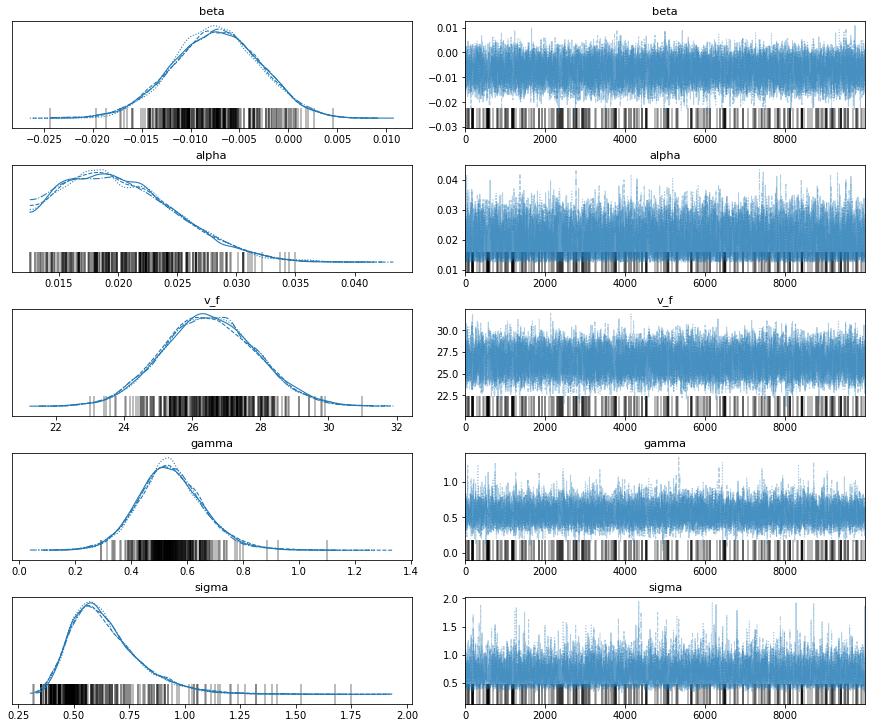

time: 1.03 s (started: 2021-07-23 19:08:54 -03:00)


In [14]:
pm.traceplot(trace)

In [15]:
import pymc3 as pm

with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/80,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=2,
                             lower=20,
                             upper=32)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    epsilon = pm.Beta('epsilon', 2, 1.5)
    
    model = alpha * df.uphill_in_m * (1 - epsilon)
    model += beta * df.downhill_in_m * (epsilon ** 2)
    model += df.distance_in_km
    model /= (v_f + gamma * df.wind_speed_in_kph)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(20_000, 
                      tune=10_000,
                      return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, epsilon, gamma, v_f, beta, alpha]


Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 65 seconds.
There were 106 divergences after tuning. Increase `target_accept` or reparameterize.
There were 192 divergences after tuning. Increase `target_accept` or reparameterize.
There were 133 divergences after tuning. Increase `target_accept` or reparameterize.
There were 243 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


time: 1min 17s (started: 2021-07-23 19:08:55 -03:00)


In [16]:
trace.posterior.median()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.007392
    alpha    float64 0.0229
    v_f      float64 25.95
    gamma    float64 0.512
    epsilon  float64 0.4775
    sigma    float64 0.6004

time: 9.6 ms (started: 2021-07-23 19:10:12 -03:00)


In [17]:
trace.posterior.std()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 0.005591
    alpha    float64 0.007002
    v_f      float64 1.349
    gamma    float64 0.1152
    epsilon  float64 0.1813
    sigma    float64 0.1588

time: 7.06 ms (started: 2021-07-23 19:10:13 -03:00)


<ipython-input-18-4b673fced3da>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'v_f'}>,
        <AxesSubplot:title={'center':'v_f'}>],
       [<AxesSubplot:title={'center':'gamma'}>,
        <AxesSubplot:title={'center':'gamma'}>],
       [<AxesSubplot:title={'center':'epsilon'}>,
        <AxesSubplot:title={'center':'epsilon'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

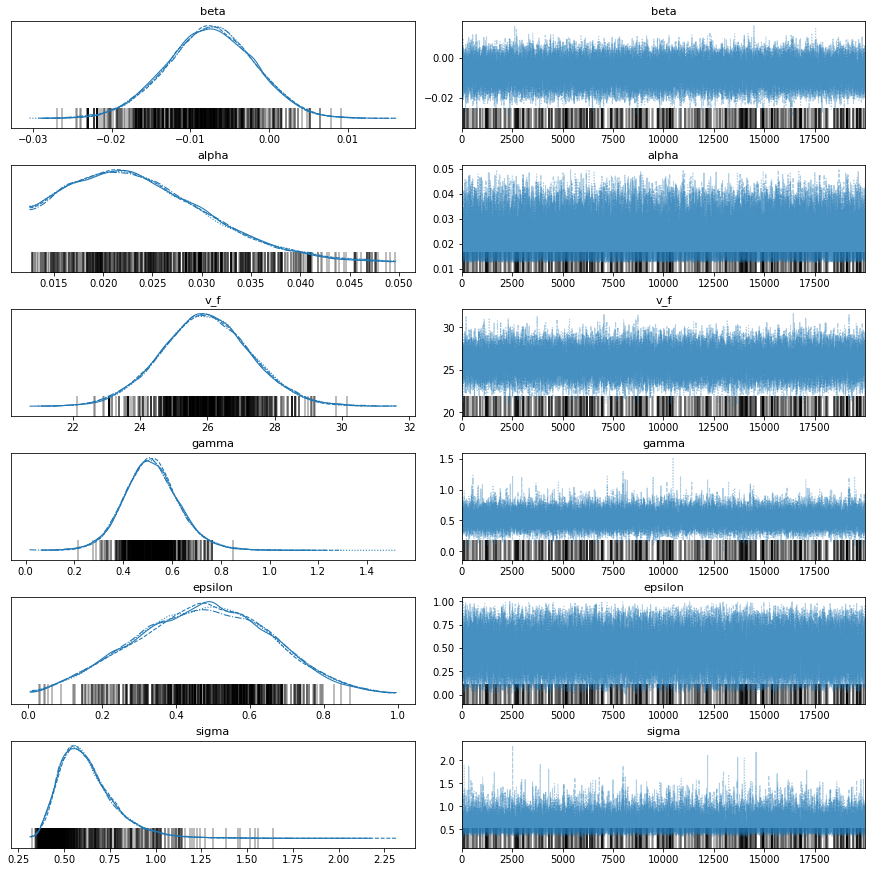

time: 1.44 s (started: 2021-07-23 19:10:13 -03:00)


In [18]:
pm.traceplot(trace)

In [19]:
import pymc3 as pm

with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/80,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=2,
                             lower=20,
                             upper=32)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    epsilon = pm.Beta('epsilon', 2, 1.5)
    
    h = df.avg_hr_in_bpm
    h_0 = pm.TruncatedNormal('h_0', 
                             mu=105,
                             sigma=20,
                             lower=80,
                             upper=125)
    psi_0 = pm.TruncatedNormal('psi_0', 
                               mu=15, 
                               sigma=10,
                               lower=0.0)
    
    psi = psi_0 * (-h_0 + h)
    
    model = alpha * df.uphill_in_m * (1 - epsilon) * psi
    model += beta * df.downhill_in_m * (epsilon ** 2)
    model += df.distance_in_km
    model /= (v_f * (psi ** 1/2) + gamma * df.wind_speed_in_kph)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(20_000, 
                      tune=10_000,
                      return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, psi_0, h_0, epsilon, gamma, v_f, beta, alpha]


Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 114 seconds.
There were 1181 divergences after tuning. Increase `target_accept` or reparameterize.
There were 638 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2167 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6681771089299883, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1912 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6708907630871852, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


time: 2min 13s (started: 2021-07-23 19:10:14 -03:00)


In [20]:
trace.posterior.median()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.007713
    alpha    float64 0.0221
    v_f      float64 25.41
    gamma    float64 0.6022
    epsilon  float64 0.5623
    h_0      float64 90.32
    psi_0    float64 0.03928
    sigma    float64 0.8717

time: 10.4 ms (started: 2021-07-23 19:12:27 -03:00)


In [21]:
trace.posterior.std()


<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 0.005502
    alpha    float64 0.006943
    v_f      float64 1.963
    gamma    float64 0.1957
    epsilon  float64 0.1933
    h_0      float64 8.16
    psi_0    float64 0.2811
    sigma    float64 0.2619

time: 8.21 ms (started: 2021-07-23 19:12:27 -03:00)


<ipython-input-22-4b673fced3da>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'v_f'}>,
        <AxesSubplot:title={'center':'v_f'}>],
       [<AxesSubplot:title={'center':'gamma'}>,
        <AxesSubplot:title={'center':'gamma'}>],
       [<AxesSubplot:title={'center':'epsilon'}>,
        <AxesSubplot:title={'center':'epsilon'}>],
       [<AxesSubplot:title={'center':'h_0'}>,
        <AxesSubplot:title={'center':'h_0'}>],
       [<AxesSubplot:title={'center':'psi_0'}>,
        <AxesSubplot:title={'center':'psi_0'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

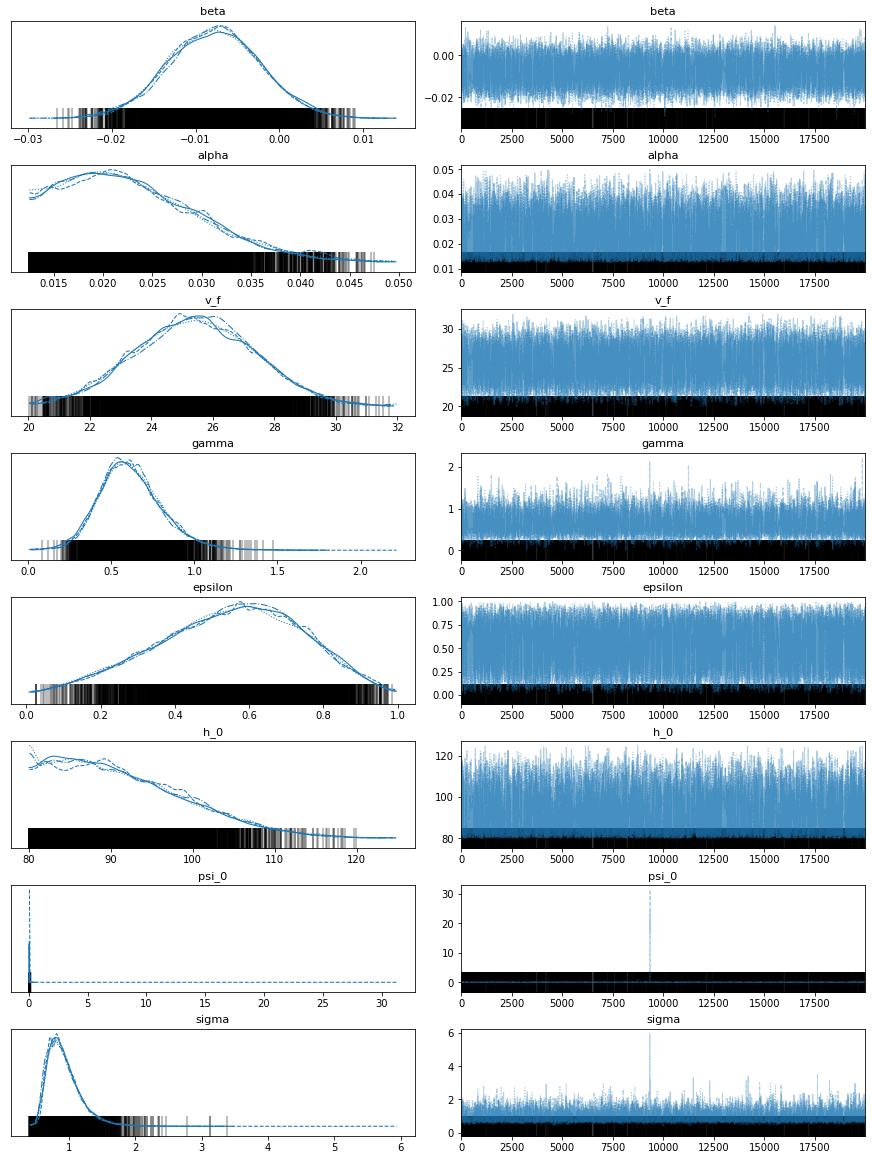

time: 1.71 s (started: 2021-07-23 19:12:27 -03:00)


In [22]:
pm.traceplot(trace)

In [23]:
import pymc3 as pm

with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/80,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=2,
                             lower=20,
                             upper=32)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    epsilon = pm.Beta('epsilon', 2, 1.5)
    
    h = df.avg_hr_in_bpm
    h_0 = pm.TruncatedNormal('h_0', 
                             mu=105,
                             sigma=20,
                             lower=80,
                             upper=125)
    psi_0 = pm.TruncatedNormal('psi_0', 
                               mu=15, 
                               sigma=10,
                               lower=0.0)
    
    psi = psi_0 * (-h_0 + h)
    
    model = alpha * df.uphill_in_m * psi
    model += beta * df.downhill_in_m
    model += df.distance_in_km
    model /= (v_f * (psi ** 1/2) + gamma * df.wind_speed_in_kph)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(20_000, 
                      tune=10_000,
                      return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, psi_0, h_0, epsilon, gamma, v_f, beta, alpha]


Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 58 seconds.
There were 18182 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.019648704912457772, but should be close to 0.8. Try to increase the number of tuning steps.
There were 12745 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.2674784741596367, but should be close to 0.8. Try to increase the number of tuning steps.
There were 11785 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.22091053990061868, but should be close to 0.8. Try to increase the number of tuning steps.
There were 16161 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.1346295192668181, but s

time: 1min 17s (started: 2021-07-23 19:12:29 -03:00)


In [24]:
trace.posterior.median()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.007696
    alpha    float64 0.01959
    v_f      float64 25.55
    gamma    float64 0.7522
    epsilon  float64 0.5868
    h_0      float64 96.71
    psi_0    float64 0.05978
    sigma    float64 1.188

time: 8.17 ms (started: 2021-07-23 19:13:46 -03:00)


In [25]:
trace.posterior.std()


<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 0.005674
    alpha    float64 0.008898
    v_f      float64 1.742
    gamma    float64 0.3015
    epsilon  float64 0.2392
    h_0      float64 10.25
    psi_0    float64 6.229
    sigma    float64 0.5105

time: 7.21 ms (started: 2021-07-23 19:13:46 -03:00)


<ipython-input-26-4b673fced3da>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'v_f'}>,
        <AxesSubplot:title={'center':'v_f'}>],
       [<AxesSubplot:title={'center':'gamma'}>,
        <AxesSubplot:title={'center':'gamma'}>],
       [<AxesSubplot:title={'center':'epsilon'}>,
        <AxesSubplot:title={'center':'epsilon'}>],
       [<AxesSubplot:title={'center':'h_0'}>,
        <AxesSubplot:title={'center':'h_0'}>],
       [<AxesSubplot:title={'center':'psi_0'}>,
        <AxesSubplot:title={'center':'psi_0'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

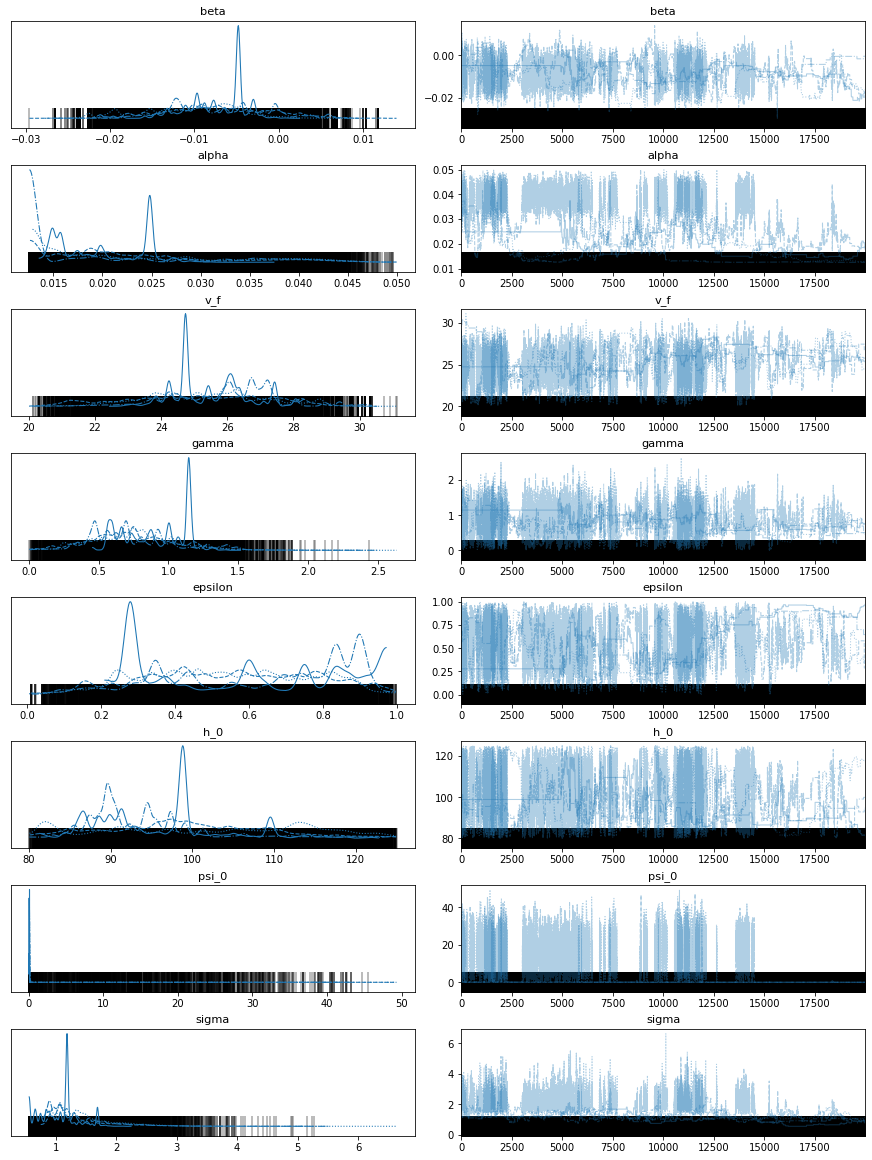

time: 1.82 s (started: 2021-07-23 19:13:46 -03:00)


In [26]:
pm.traceplot(trace)


In [27]:
import pymc3 as pm

with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/80,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=2,
                             lower=20,
                             upper=32)
    
    model = (alpha * df.uphill_in_m + beta * df.downhill_in_m)
    model += df.distance_in_km
    model /= v_f
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(10_000, 
                      tune=10_000,
                      return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, v_f, beta, alpha]


Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 35 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


time: 50.2 s (started: 2021-07-23 19:14:56 -03:00)


In [28]:
trace.posterior.median()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.009884
    alpha    float64 0.01805
    v_f      float64 27.08
    sigma    float64 1.175

time: 5.1 ms (started: 2021-07-23 19:15:47 -03:00)


In [29]:
trace.posterior.std()


<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 0.004647
    alpha    float64 0.004533
    v_f      float64 1.488
    sigma    float64 0.292

time: 7.51 ms (started: 2021-07-23 19:15:47 -03:00)


<ipython-input-30-4b673fced3da>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


array([[<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'v_f'}>,
        <AxesSubplot:title={'center':'v_f'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

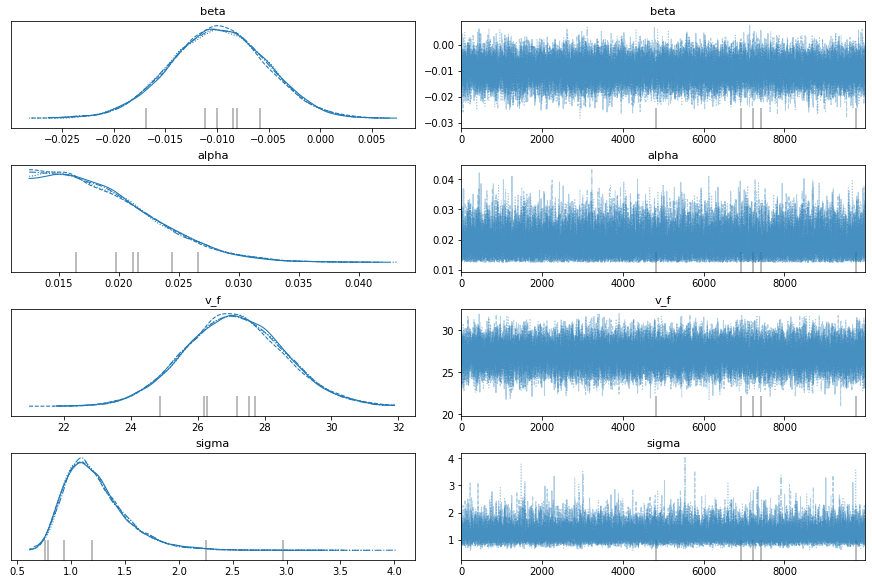

time: 778 ms (started: 2021-07-23 19:15:47 -03:00)


In [30]:
pm.traceplot(trace)


In [ ]:
import pymc3 as pm

with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/80,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=2,
                             lower=20,
                             upper=32)
    
    model = (alpha * df.uphill_in_m + beta * df.downhill_in_m)
    model += df.distance_in_km
    model /= v_f
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(10_000, 
                      tune=10_000,
                      return_inferencedata=True)